In [212]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [213]:
# naming the columns According to the Descriptions 
col_names = ['ID', 'Target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness', 'concavity_mean', 'concave_mean',
            'symmetry_mean', 'fractal_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se','concavity_se', 'concave_se', 
             'symmetry_se', 'fractal_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
            'concavity_worst', 'concave_worst', 'symmetry_worst', 'fractal_worst']

In [214]:
data = pd.read_csv('a3.csv', names = col_names, header=None)

In [215]:
# Dropping the ID Column as it is of no Use
data = data.drop(columns = ['ID'])

In [216]:
# Quick Look at the Dataset
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness,concavity_mean,concave_mean,symmetry_mean,fractal_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_worst,symmetry_worst,fractal_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [217]:
# Their is no Missing values 
data.isna().sum()

Target               0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness          0
concavity_mean       0
concave_mean         0
symmetry_mean        0
fractal_mean         0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
concave_se           0
symmetry_se          0
fractal_se           0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
concave_worst        0
symmetry_worst       0
fractal_worst        0
dtype: int64

In [218]:
# Encoding the Target Variable(M as 1 and B as 0)
Labelling = LabelEncoder()
data['Target'] = Labelling.fit_transform(data['Target'])
data.head()

,Target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness,concavity_mean,concave_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_worst,symmetry_worst,fractal_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [219]:
X = data.drop(columns = ['Target'])
Y = data['Target']

<AxesSubplot:>

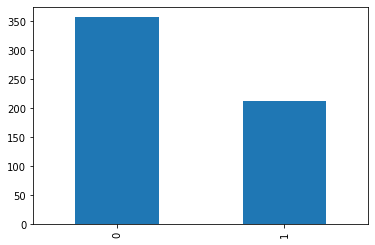

In [220]:
# Visualizing the target Varible 
Y.value_counts().plot(kind='bar')

In [221]:
# performing train test split 
X_train, X_test, y_train, Y_test = train_test_split(
   X, Y, test_size=0.20, random_state=42)

In [222]:
# Scaling the Traning Data and Applying same tranformation to Test Data
Scaling = MinMaxScaler()
X_train = Scaling.fit_transform(X_train)
X_test = Scaling.transform(X_test)

**LOGISTICS CLASSIFIER**

In [223]:
Logistic_classifier = LogisticRegression(random_state=42)
t1 = time.time()
Logistic_model = Logistic_classifier.fit(X_train, y_train)
t2 = time.time()
Logistics_time = t2-t1 

**SVM CLASSIFIER**

In [224]:
SVM_Classifier = SVC(random_state = 42)
t1 = time.time()
SVM_model = SVM_Classifier.fit(X_train, y_train)
t2 = time.time()
svm_time = t2-t1 

**DECISON TREE CLASSIFIER**

In [225]:
Decision_tree_classifier = DecisionTreeClassifier(random_state = 42)
t1 = time.time()
Decision_tree_model = Decision_tree_classifier.fit(X_train, y_train)
t2 = time.time()
dt_time = t2-t1 

**RANDOM FOREST CLASSIFIER**

In [226]:
Random_classifier = RandomForestClassifier(random_state = 42)
t1 = time.time()
Random_forest_model = Random_classifier.fit(X_train, y_train)
t2 = time.time()
rf_time = t2-t1 

**TRAINING TIME OF DIFFERENT CLASSIFIERS**

In [227]:
t = PrettyTable(['Classifier', 'Training Time'])
t.add_row(['Logistics Regression', round(Logistics_time, 4)])
t.add_row(['Support Vector Machine', round(svm_time, 4)])
t.add_row(['Decision Tree', round(dt_time, 4)])
t.add_row(['Random forest', round(rf_time, 4)])
print(t)

+------------------------+---------------+
|       Classifier       | Training Time |
+------------------------+---------------+
|  Logistics Regression  |     0.0249    |
| Support Vector Machine |     0.013     |
|     Decision Tree      |     0.0289    |
|     Random forest      |     0.386     |
+------------------------+---------------+


In [228]:
from prettytable import PrettyTable
t = PrettyTable(['Classifier', 'Accuracy', 'precision', 'Recall'])
t.add_row(['Logistics Regression', round(accuracy_score(Y_test, Logistic_model.predict(X_test)), 4) *100
                       , round(recall_score(Y_test, Logistic_model.predict(X_test)), 4) *100
                       , round(precision_score(Y_test, Logistic_model.predict(X_test)), 4) *100])

t.add_row(['Support Vector Machine', round(accuracy_score(Y_test, SVM_model.predict(X_test)), 4) *100
                       , round(recall_score(Y_test, SVM_model.predict(X_test)), 4) *100
                       , round(precision_score(Y_test, SVM_model.predict(X_test)), 4) *100])

t.add_row(['Decision Tree', round(accuracy_score(Y_test, Decision_tree_model.predict(X_test)), 4) *100
                       , round(recall_score(Y_test, Decision_tree_model.predict(X_test)), 4) *100
                       , round(precision_score(Y_test, Decision_tree_model.predict(X_test)), 4) *100])

t.add_row(['Random forest', round(accuracy_score(Y_test, Random_forest_model.predict(X_test)), 4) *100
                       , round(recall_score(Y_test, Random_forest_model.predict(X_test)), 4) *100
                       , round(precision_score(Y_test, Random_forest_model.predict(X_test)), 4) *100])


print(t)


+------------------------+-------------------+-----------+-------------------+
|       Classifier       |      Accuracy     | precision |       Recall      |
+------------------------+-------------------+-----------+-------------------+
|  Logistics Regression  |       98.25       |   95.35   |       100.0       |
| Support Vector Machine |       97.37       |   95.35   | 97.61999999999999 |
|     Decision Tree      | 94.74000000000001 |   93.02   |       93.02       |
|     Random forest      |       96.49       |   93.02   |       97.56       |
+------------------------+-------------------+-----------+-------------------+


**PCA TO REDUCE DIMENSIONALITY WITH AN EXPLAINED VARIANCE OF 95%**

In [229]:
pca = PCA(n_components = 0.95).fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

**SHOWING EXPLAINED VARIANCE (UNTIL 0.95) OF EACH COMPONENT**

In [230]:
x = PrettyTable()
column_names = ["n_components", "Explained_variance"]
x.add_column(column_names[0], list(range(0,10)))
x.add_column(column_names[1], list(np.cumsum(pca.explained_variance_ratio_)*100))
print(x)

+--------------+--------------------+
| n_components | Explained_variance |
+--------------+--------------------+
|      0       | 51.23360798091058  |
|      1       |  69.8259870834621  |
|      2       | 77.03297241569138  |
|      3       | 83.42367709970917  |
|      4       | 87.41531046425364  |
|      5       | 90.78156463954696  |
|      6       | 92.35603834496261  |
|      7       | 93.68718716555422  |
|      8       | 94.69271452491041  |
|      9       | 95.67592643843032  |
+--------------+--------------------+


**COMPONENTS VS EXPLAINED VARIANCE DISTRIBUTION**

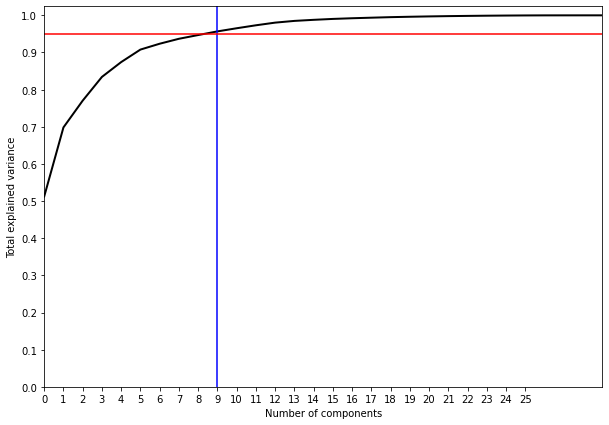

In [242]:
pca = PCA().fit(X_train)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(9, c='b')
plt.axhline(0.95, c='r')
plt.xticks(range(0,26))
plt.show();

**TRANING DIFFERENT CLASSIFIERS WITH REDUCED DIMENSION (VARIANCE=0.95)**

In [232]:
Logistic_classifier = LogisticRegression(random_state=42)
t1 = time.time()
Logistic_model = Logistic_classifier.fit(X_train_reduced, y_train)
t2 = time.time()
Logistics_time = t2-t1 

SVM_Classifier = SVC(random_state = 42)
t1 = time.time()
SVM_model = SVM_Classifier.fit(X_train_reduced, y_train)
t2 = time.time()
svm_time = t2-t1 

Decision_tree_classifier = DecisionTreeClassifier(random_state = 42)
t1 = time.time()
Decision_tree_model = Decision_tree_classifier.fit(X_train_reduced, y_train)
t2 = time.time()
dt_time = t2-t1 

Random_classifier = RandomForestClassifier(random_state = 42)
t1 = time.time()
Random_forest_model = Random_classifier.fit(X_train_reduced, y_train)
t2 = time.time()
rf_time = t2-t1 

**RUN TIME WIH REDUCED DIMENSION (VARIANCE = 0.95)**

In [233]:
t = PrettyTable(['Classifier', 'Training Time'])
t.add_row(['Logistics Regression', round(Logistics_tim, 4)])
t.add_row(['Support Vector Machine', round(svm_time, 4)])
t.add_row(['Decision Tree', round(dt_time, 4)])
t.add_row(['Random forest', round(rf_time, 4)])
print(t)

+------------------------+---------------+
|       Classifier       | Training Time |
+------------------------+---------------+
|  Logistics Regression  |     0.006     |
| Support Vector Machine |     0.004     |
|     Decision Tree      |     0.004     |
|     Random forest      |     0.1646    |
+------------------------+---------------+


**MODEL EVALUATION (VARIANCE = 0.95)**

In [234]:
t = PrettyTable(['Classifier', 'Accuracy', 'precision', 'Recall'])
t.add_row(['Logistics Regression', round(accuracy_score(Y_test, Logistic_model.predict(X_test_reduced)), 4) *100
                       , round(recall_score(Y_test, Logistic_model.predict(X_test_reduced)), 4) *100
                       , round(precision_score(Y_test, Logistic_model.predict(X_test_reduced)), 4) *100])

t.add_row(['Support Vector Machine', round(accuracy_score(Y_test, SVM_model.predict(X_test_reduced)), 4) *100
                       , round(recall_score(Y_test, SVM_model.predict(X_test_reduced)), 4) *100
                       , round(precision_score(Y_test, SVM_model.predict(X_test_reduced)), 4) *100])

t.add_row(['Decision Tree', round(accuracy_score(Y_test, Decision_tree_model.predict(X_test_reduced)), 4) *100
                       , round(recall_score(Y_test, Decision_tree_model.predict(X_test_reduced)), 4) *100
                       , round(precision_score(Y_test, Decision_tree_model.predict(X_test_reduced)), 4) *100])

t.add_row(['Random forest', round(accuracy_score(Y_test, Random_forest_model.predict(X_test_reduced)), 4) *100
                       , round(recall_score(Y_test, Random_forest_model.predict(X_test_reduced)), 4) *100
                       , round(precision_score(Y_test, Random_forest_model.predict(X_test_reduced)), 4) *100])


print(t)

+------------------------+-------------------+-----------+-------------------+
|       Classifier       |      Accuracy     | precision |       Recall      |
+------------------------+-------------------+-----------+-------------------+
|  Logistics Regression  |       98.25       |   95.35   |       100.0       |
| Support Vector Machine |       97.37       |   95.35   | 97.61999999999999 |
|     Decision Tree      | 92.97999999999999 |   88.37   | 92.67999999999999 |
|     Random forest      | 94.74000000000001 |   93.02   |       93.02       |
+------------------------+-------------------+-----------+-------------------+


**PERFORMING PCA WITH 2 COMPONENTS**

In [235]:
pca = PCA(n_components = 2).fit(X_train)
X_train_transform = pca.transform(X_train)
X_test_transform = pca.transform(X_test)

In [236]:
Logistic_classifier = LogisticRegression(random_state=42)
t1 = time.time()
Logistic_model = Logistic_classifier.fit(X_train_transform, y_train)
t2 = time.time()
Logistics_time = t2-t1 

SVM_Classifier = SVC(random_state = 42)
t1 = time.time()
SVM_model = SVM_Classifier.fit(X_train_transform, y_train)
t2 = time.time()
svm_time = t2-t1 

Decision_tree_classifier = DecisionTreeClassifier(random_state = 42)
t1 = time.time()
Decision_tree_model = Decision_tree_classifier.fit(X_train_transform, y_train)
t2 = time.time()
dt_time = t2-t1 

Random_classifier = RandomForestClassifier(random_state = 42)
t1 = time.time()
Random_forest_model = Random_classifier.fit(X_train_transform, y_train)
t2 = time.time()
rf_time = t2-t1 

**RUN TIME WIH REDUCED DIMENSION (n_components = 2)**

In [237]:
t = PrettyTable(['Classifier', 'Training Time'])
t.add_row(['Logistics Regression', round(Logistics_time, 4)])
t.add_row(['Support Vector Machine', round(svm_time, 4)])
t.add_row(['Decision Tree', round(dt_time, 4)])
t.add_row(['Random forest', round(rf_time, 4)])
print(t)

+------------------------+---------------+
|       Classifier       | Training Time |
+------------------------+---------------+
|  Logistics Regression  |     0.003     |
| Support Vector Machine |     0.004     |
|     Decision Tree      |     0.002     |
|     Random forest      |     0.1277    |
+------------------------+---------------+


**MODEL EVALUATION (n_components = 2)**

In [238]:
t = PrettyTable(['Classifier', 'Accuracy', 'precision', 'Recall'])
t.add_row(['Logistics Regression', round(accuracy_score(Y_test, Logistic_model.predict(X_test_transform)), 4) *100
                       , round(recall_score(Y_test, Logistic_model.predict(X_test_transform)), 4) *100
                       , round(precision_score(Y_test, Logistic_model.predict(X_test_transform)), 4) *100])

t.add_row(['Support Vector Machine', round(accuracy_score(Y_test, SVM_model.predict(X_test_transform)), 4) *100
                       , round(recall_score(Y_test, SVM_model.predict(X_test_transform)), 4) *100
                       , round(precision_score(Y_test, SVM_model.predict(X_test_transform)), 4) *100])

t.add_row(['Decision Tree', round(accuracy_score(Y_test, Decision_tree_model.predict(X_test_transform)), 4) *100
                       , round(recall_score(Y_test, Decision_tree_model.predict(X_test_transform)), 4) *100
                       , round(precision_score(Y_test, Decision_tree_model.predict(X_test_transform)), 4) *100])

t.add_row(['Random forest', round(accuracy_score(Y_test, Random_forest_model.predict(X_test_transform)), 4) *100
                       , round(recall_score(Y_test, Random_forest_model.predict(X_test_transform)), 4) *100
                       , round(precision_score(Y_test, Random_forest_model.predict(X_test_transform)), 4) *100])


print(t)

+------------------------+----------+-----------+--------+
|       Classifier       | Accuracy | precision | Recall |
+------------------------+----------+-----------+--------+
|  Logistics Regression  |  96.49   |    90.7   | 100.0  |
| Support Vector Machine |  95.61   |    90.7   |  97.5  |
|     Decision Tree      |  95.61   |    90.7   |  97.5  |
|     Random forest      |  97.37   |   93.02   | 100.0  |
+------------------------+----------+-----------+--------+


Text(0, 0.5, 'Second Principal Component')

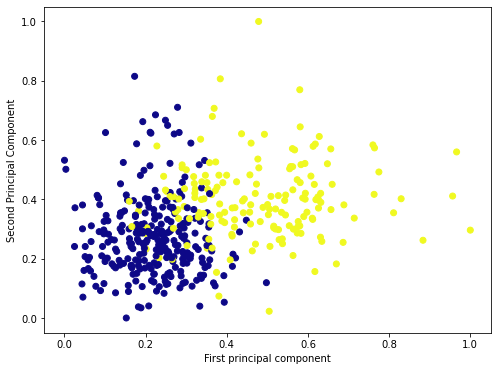

In [240]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')